In [1]:
pip install segyio

Note: you may need to restart the kernel to use updated packages.


In [1]:
import segyio
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
filename = 'Poseidon3D_Final_PSDM_Decimated_vels.segy'

In [2]:
def parse_trace_headers(segyfile, n_traces):
    '''
    Parse the segy file trace headers into a pandas dataframe.
    Column names are defined from segyio internal tracefield
    One row per trace
    '''
    # Get all header keys
    headers = segyio.tracefield.keys
    # Initialize dataframe with trace id as index and headers as columns
    df = pd.DataFrame(index=range(1, n_traces + 1),
                      columns=headers.keys())
    # Fill dataframe with all header values
    for k, v in headers.items():
        df[k] = segyfile.attributes(v)[:]
    return df


def parse_text_header(segyfile):
    '''
    Format segy text header into a readable, clean dict
    '''
    raw_header = segyio.tools.wrap(segyfile.text[0])
    # Cut on C*int pattern
    cut_header = re.split(r'C ', raw_header)[1::]
    # Remove end of line return
    text_header = [x.replace('\n', ' ') for x in cut_header]
    text_header[-1] = text_header[-1][:-2]
    # Format in dict
    clean_header = {}
    i = 1
    for item in text_header:
        key = "C" + str(i).rjust(2, '0')
        i += 1
        clean_header[key] = item
    return clean_header

In [3]:
with segyio.open(filename, ignore_geometry=True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]  # Get all data into memory (could cause on big files)
    # Load headers
    bin_headers = f.bin
    text_headers = parse_text_header(f)
    trace_headers = parse_trace_headers(f, n_traces)
f'N Traces: {n_traces}, N Samples: {n_samples}, Sample rate: {sample_rate}ms'

'N Traces: 766287, N Samples: 500, Sample rate: 20.0ms'

In [4]:
clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

'The 99th percentile is 5415; the max amplitude is 6374'

### Length of section is 843 traces

In [93]:
list_trace = []
trace_number= 6744
for i in range(1000):
    list_trace.append(trace_number)
    trace_number = trace_number+843

In [103]:
j=0
i=0

C:\Users\tanni\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


IndexError: cannot do a non-empty take from an empty axes.

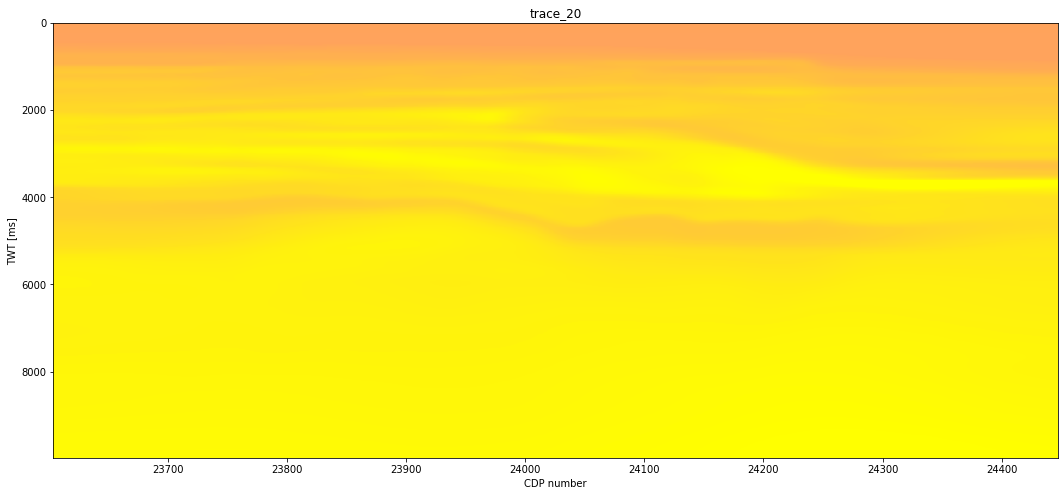

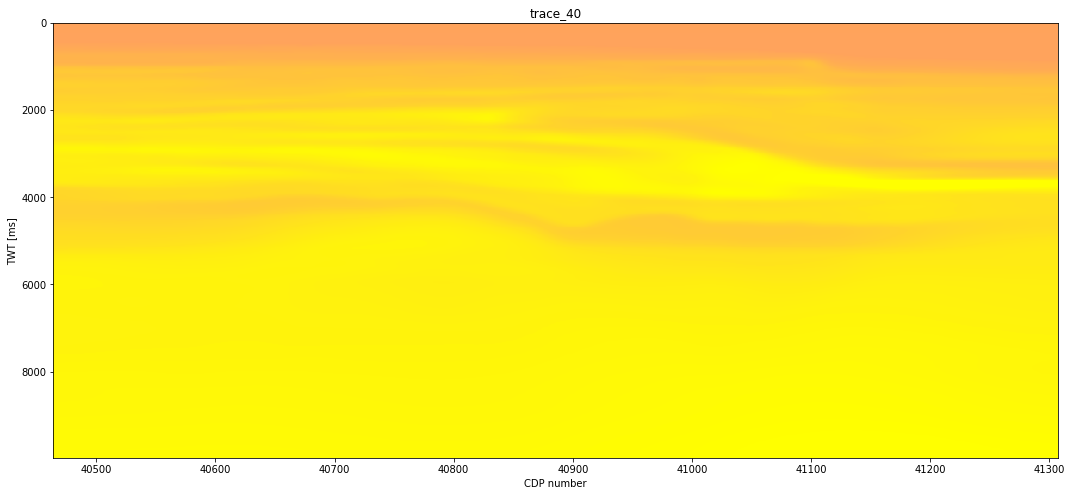

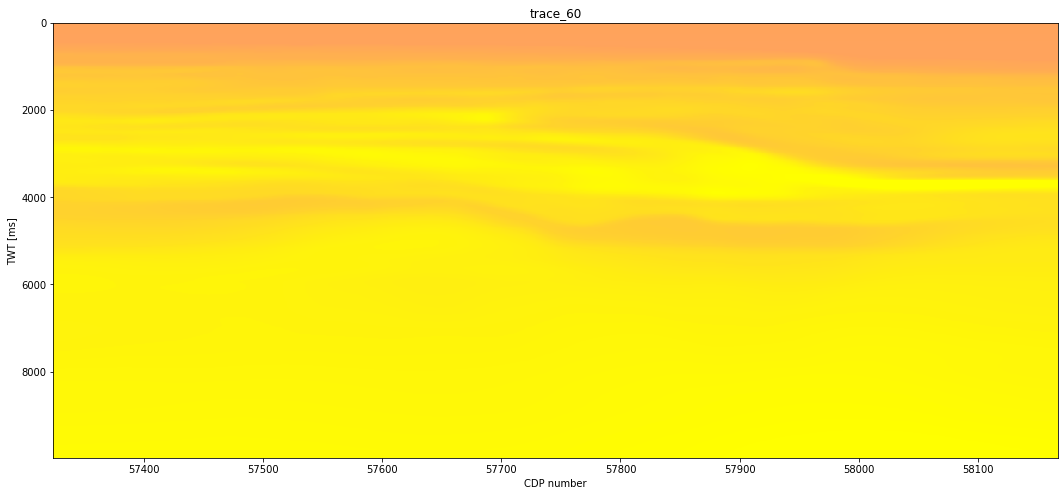

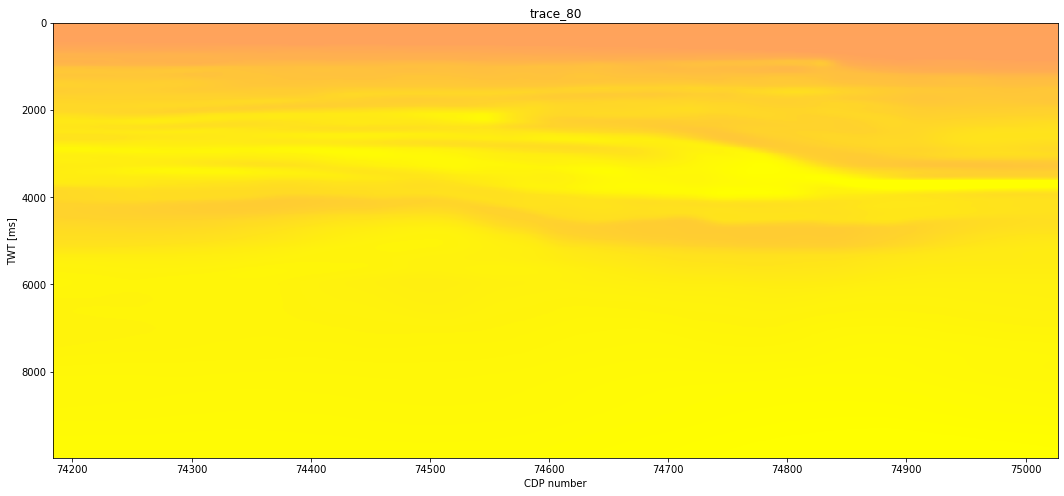

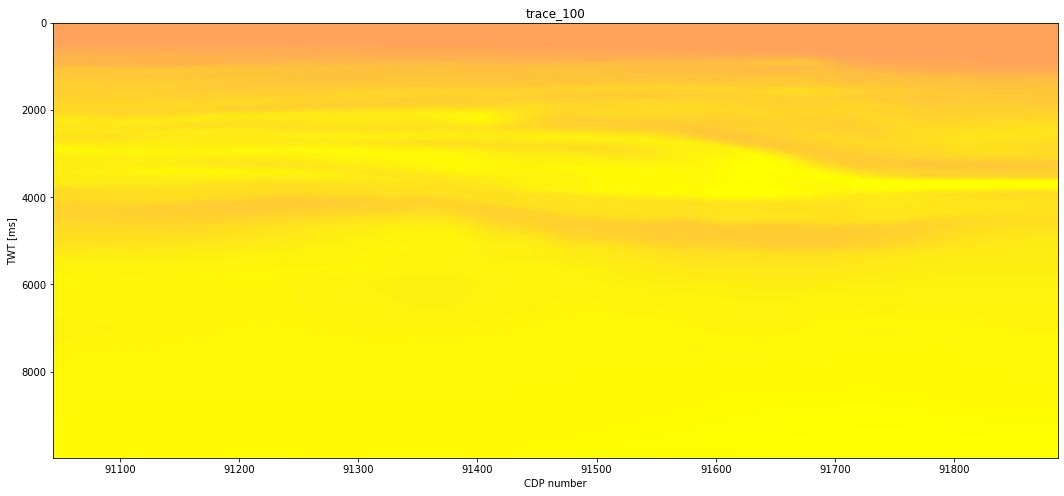

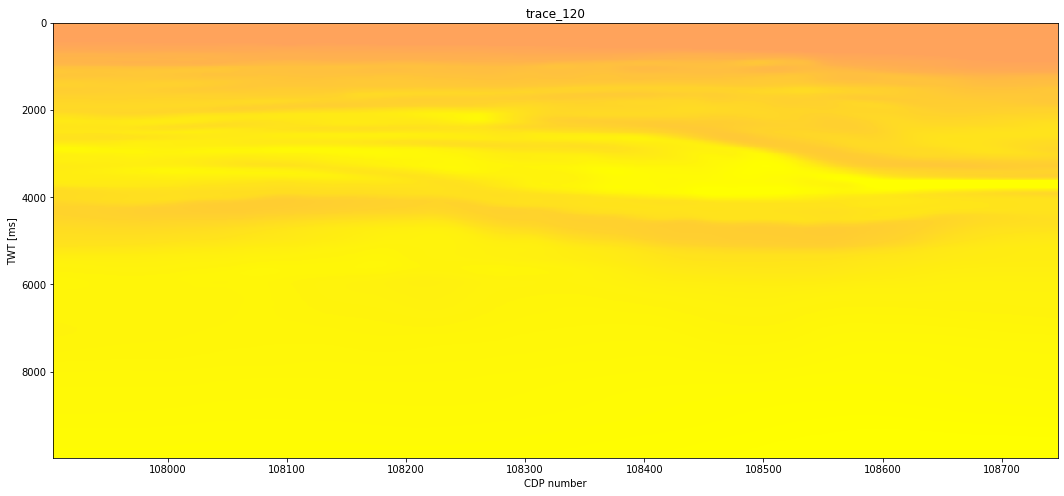

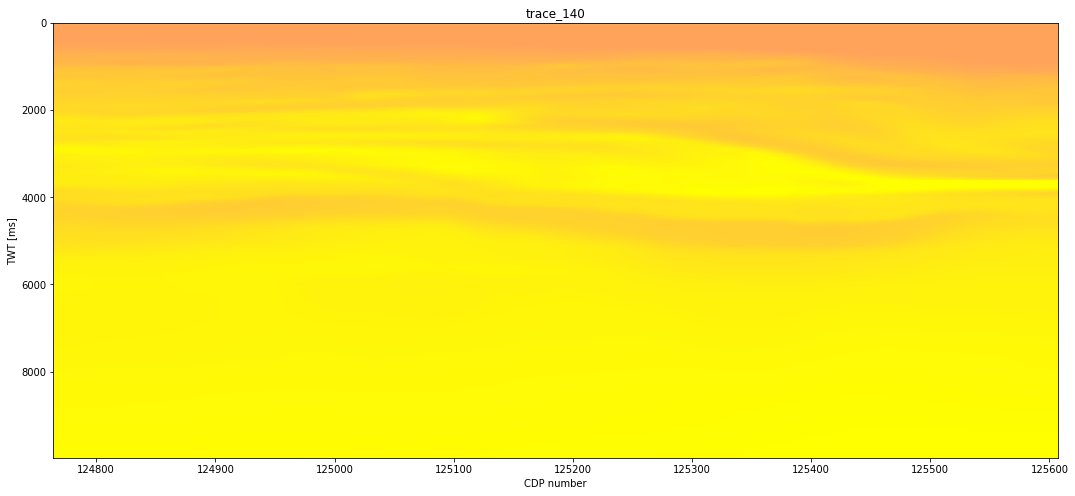

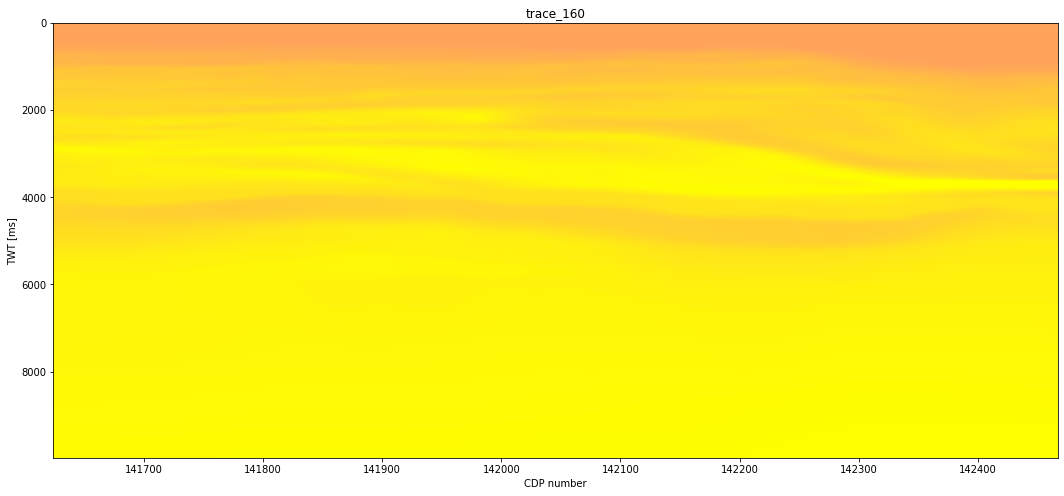

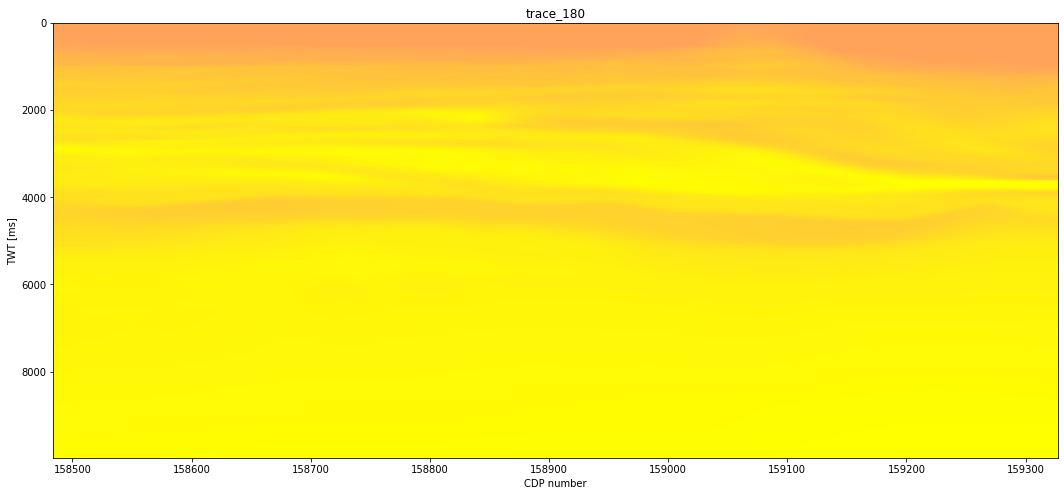

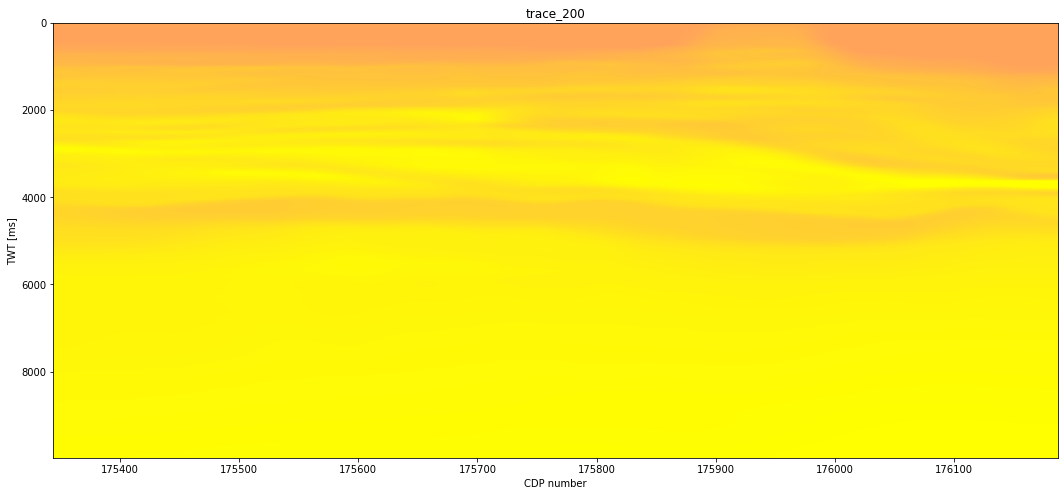

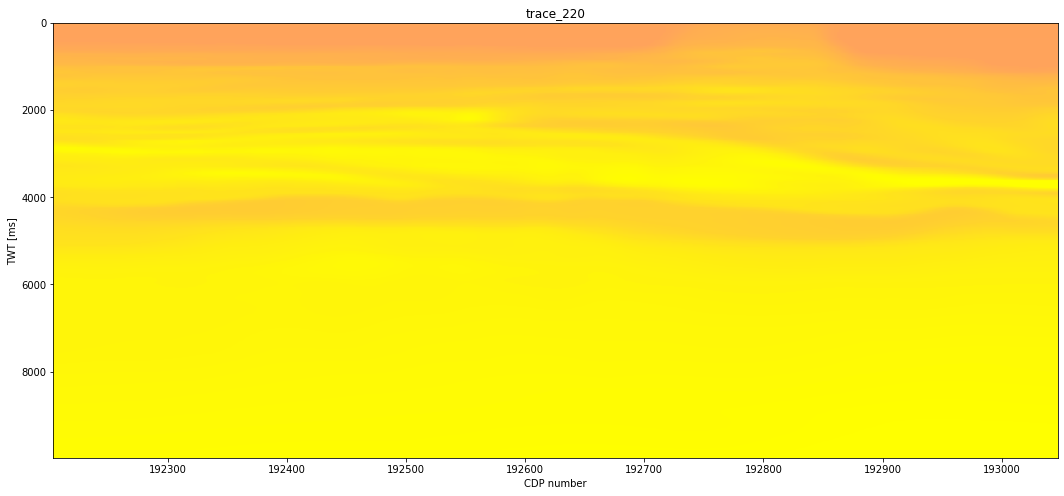

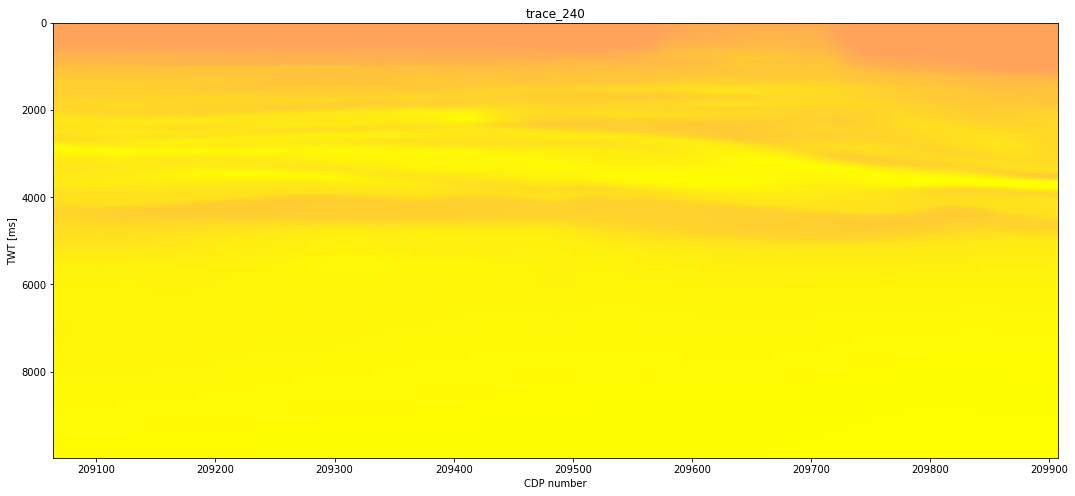

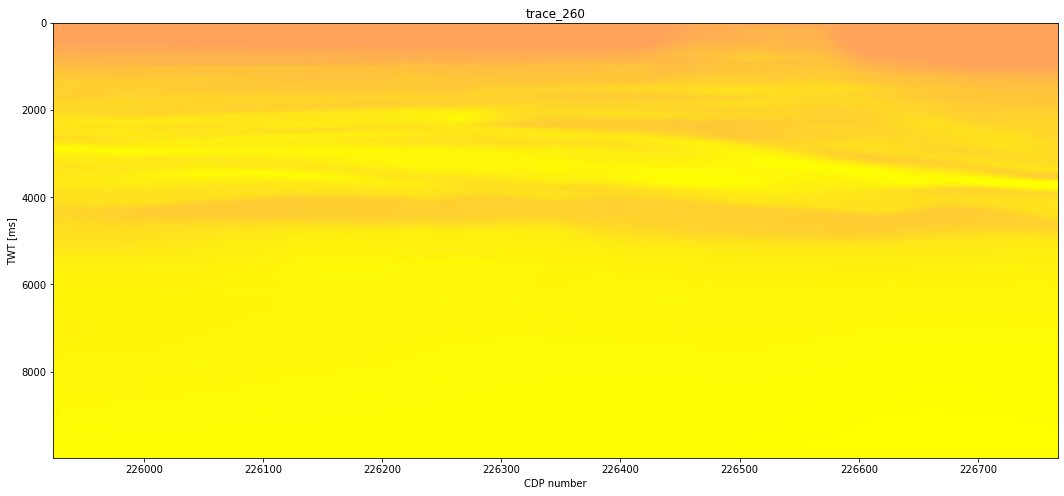

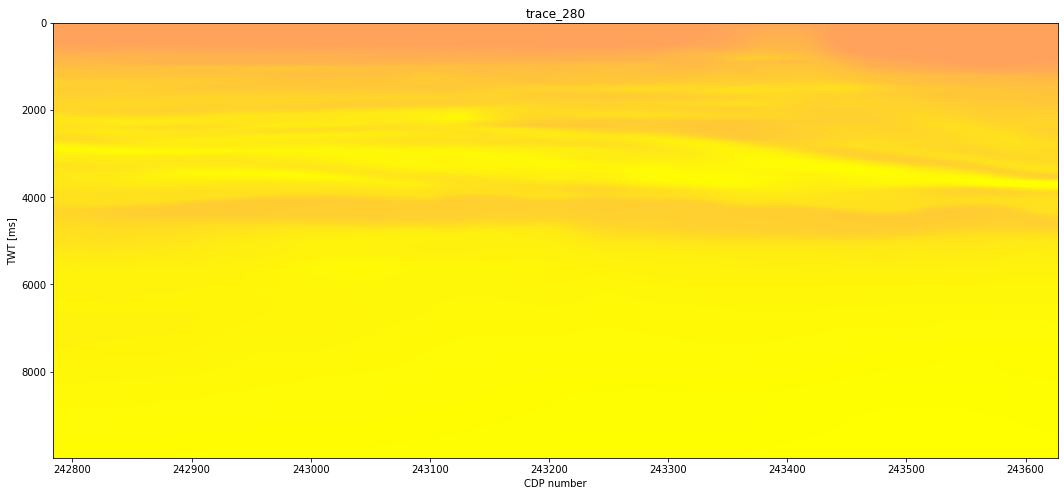

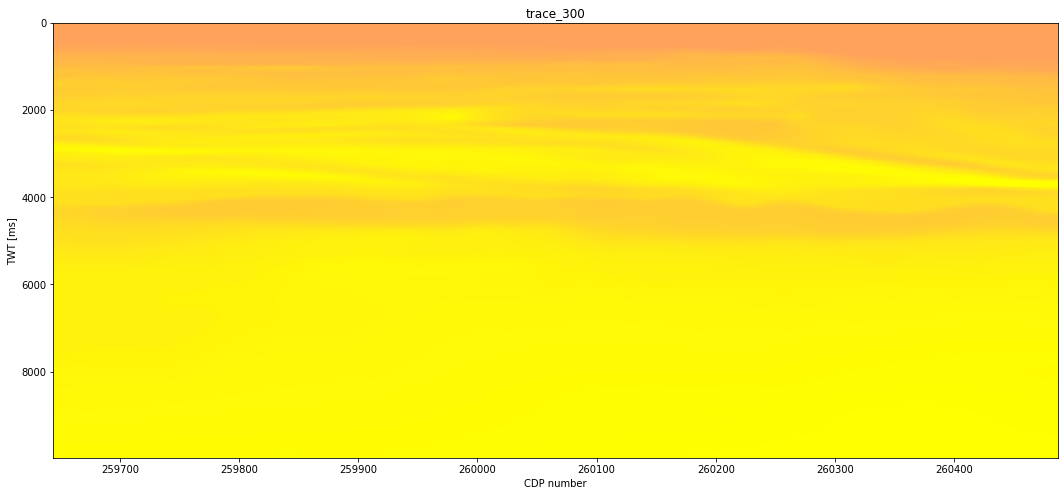

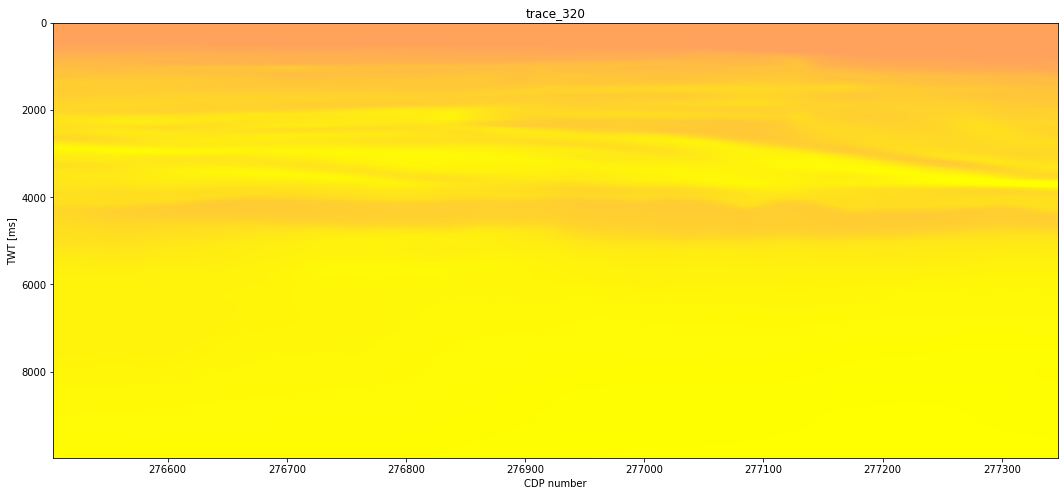

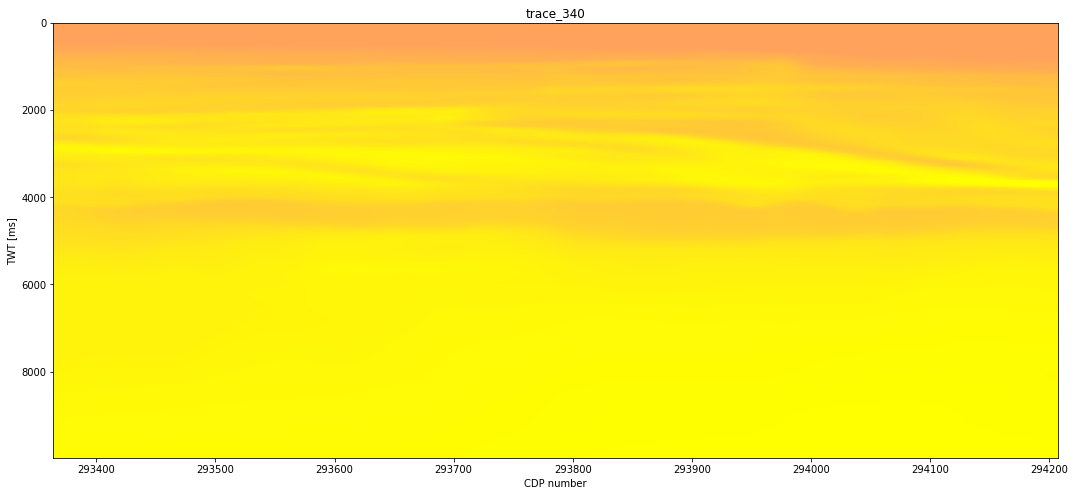

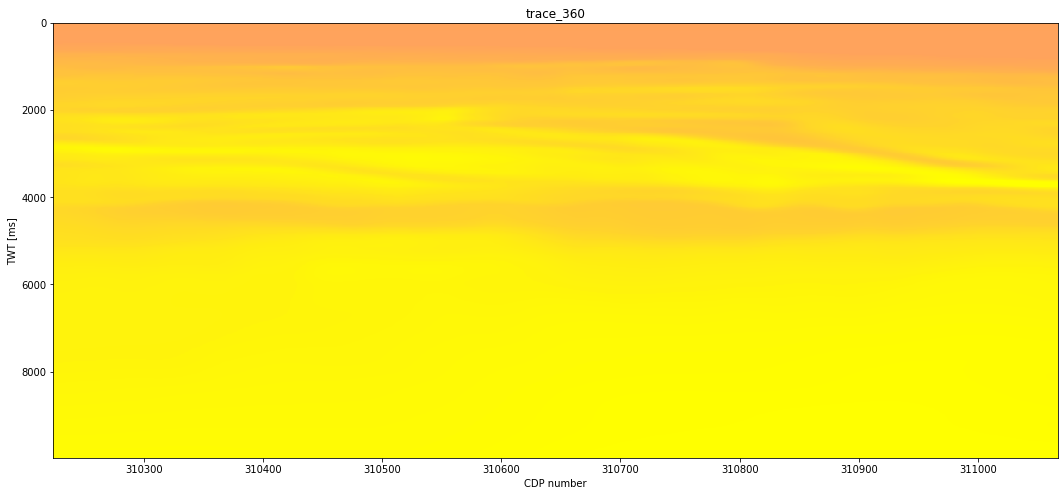

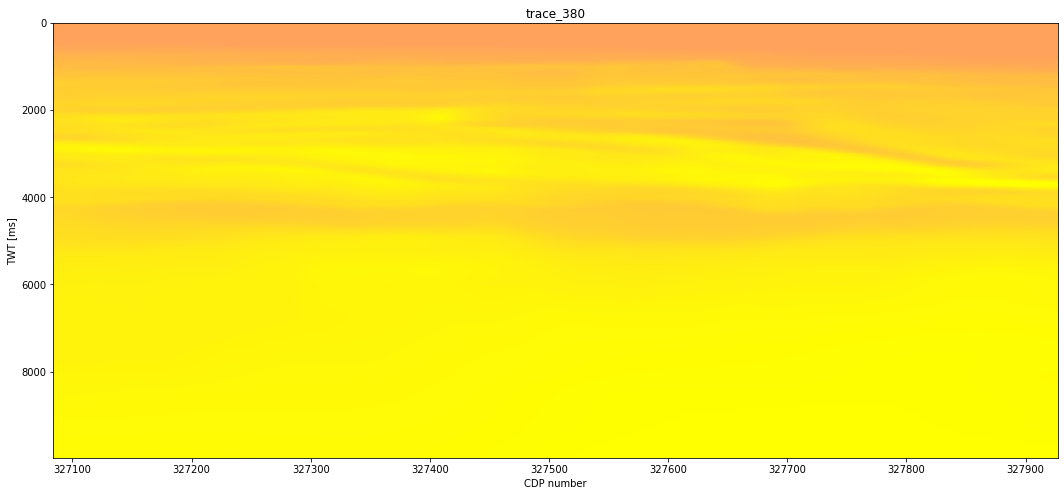

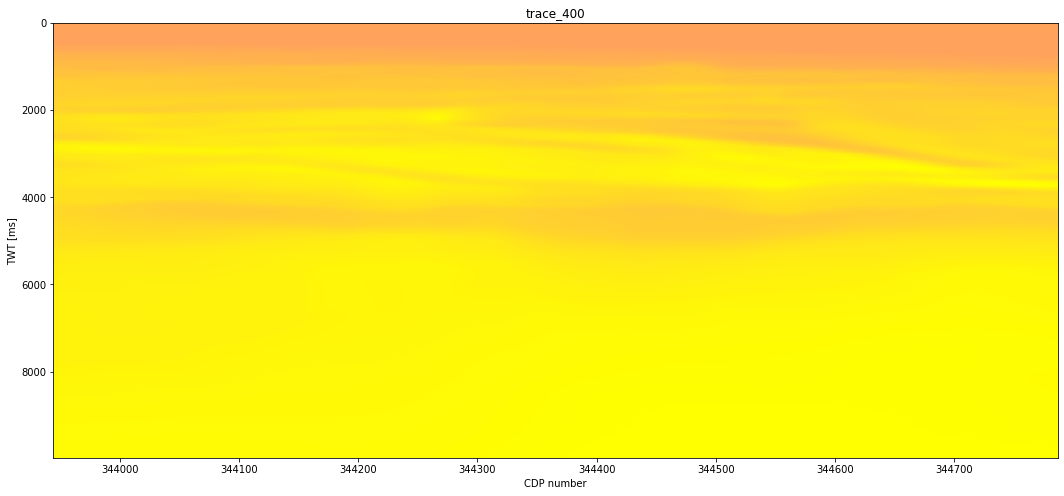

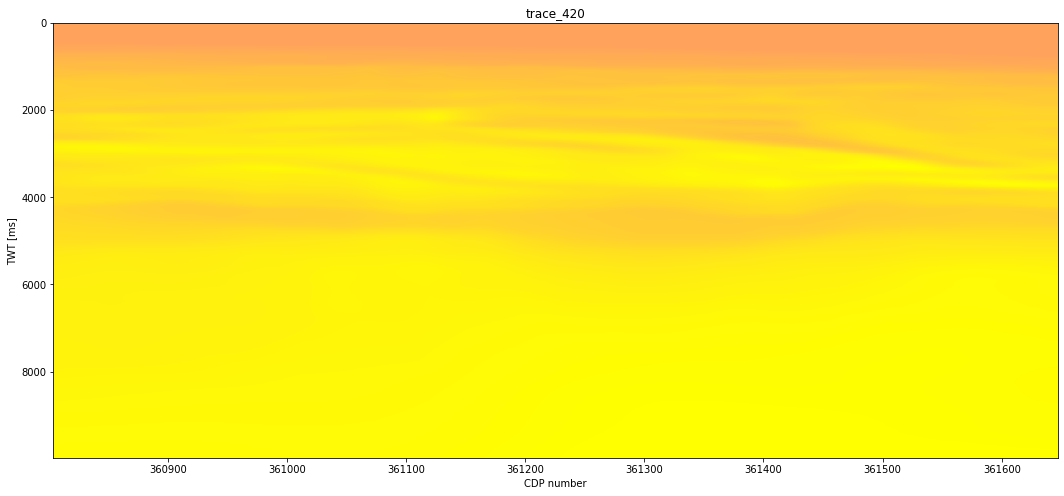

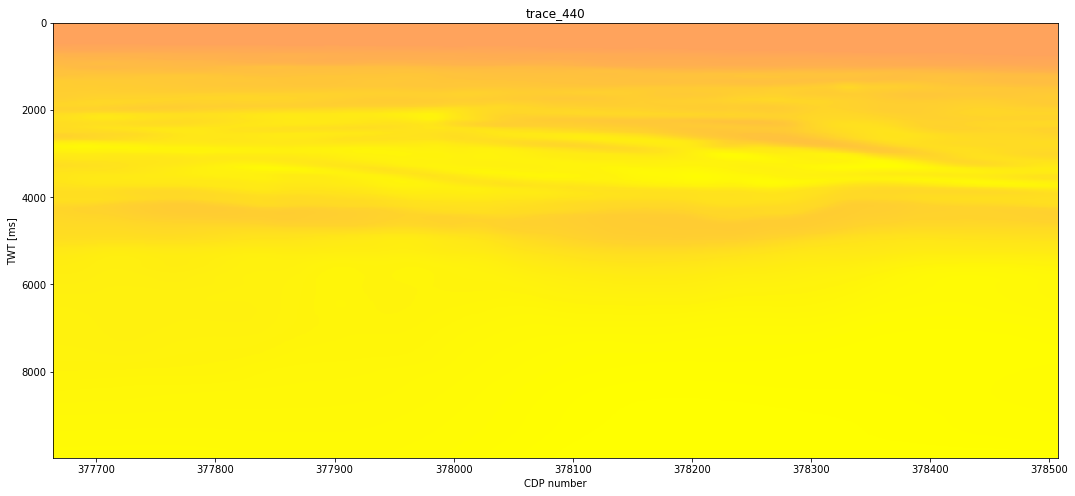

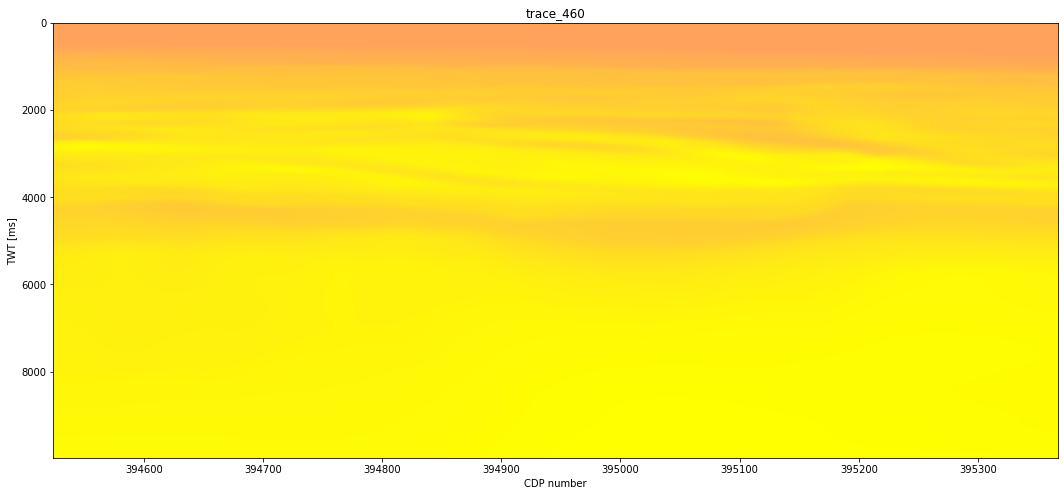

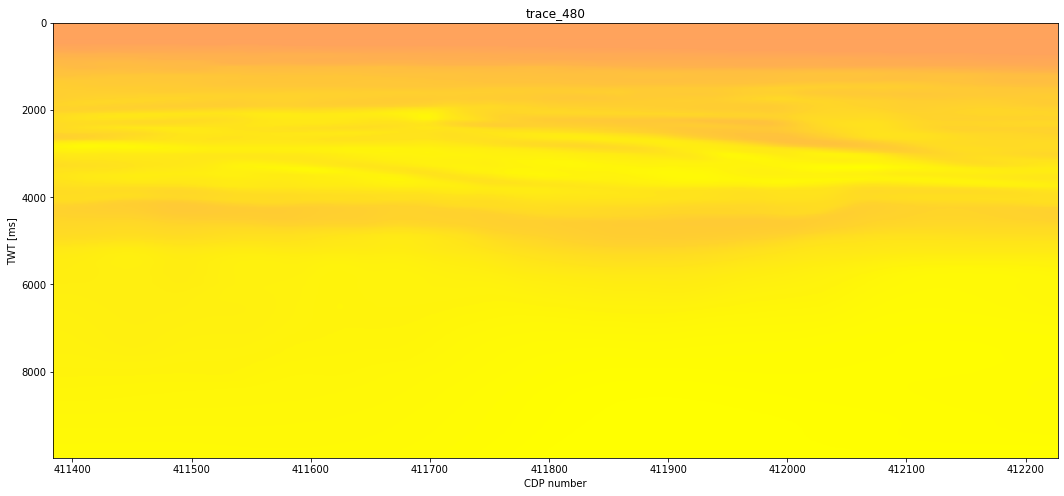

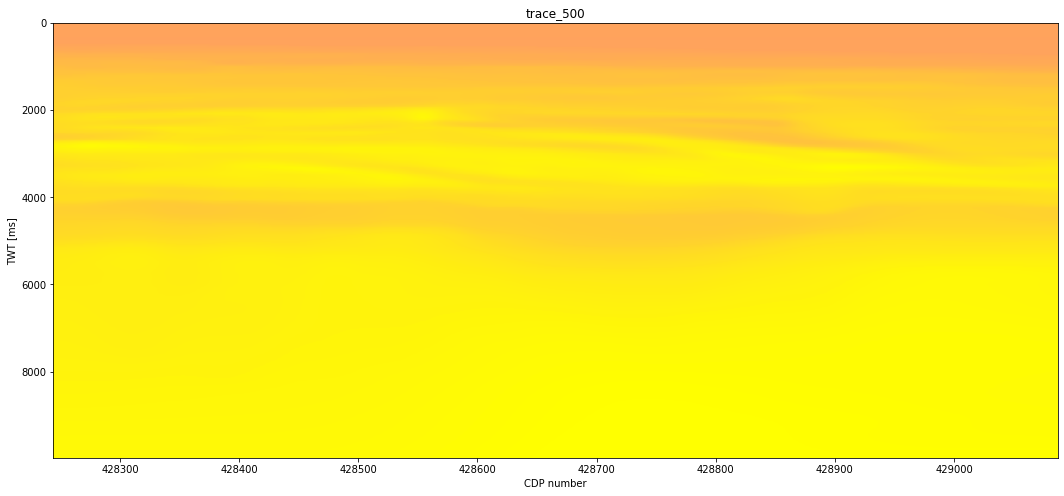

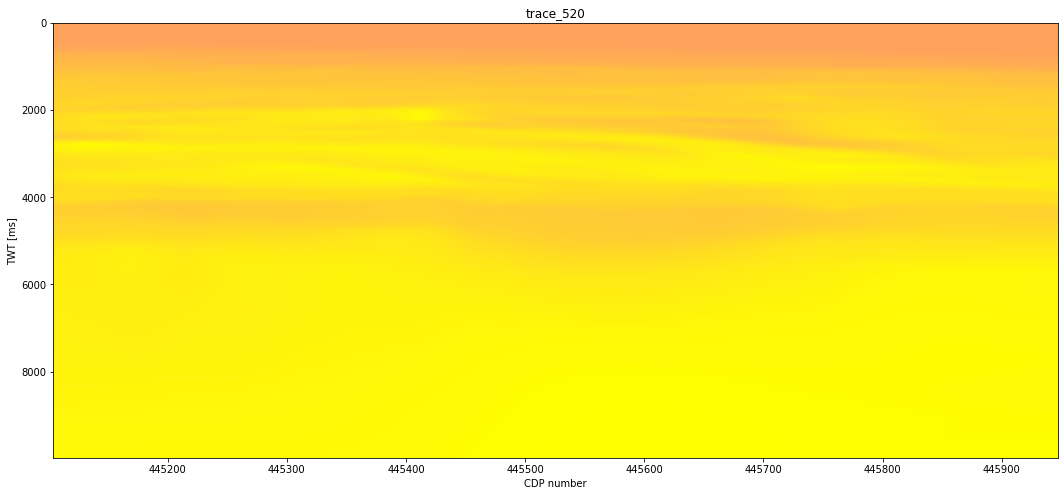

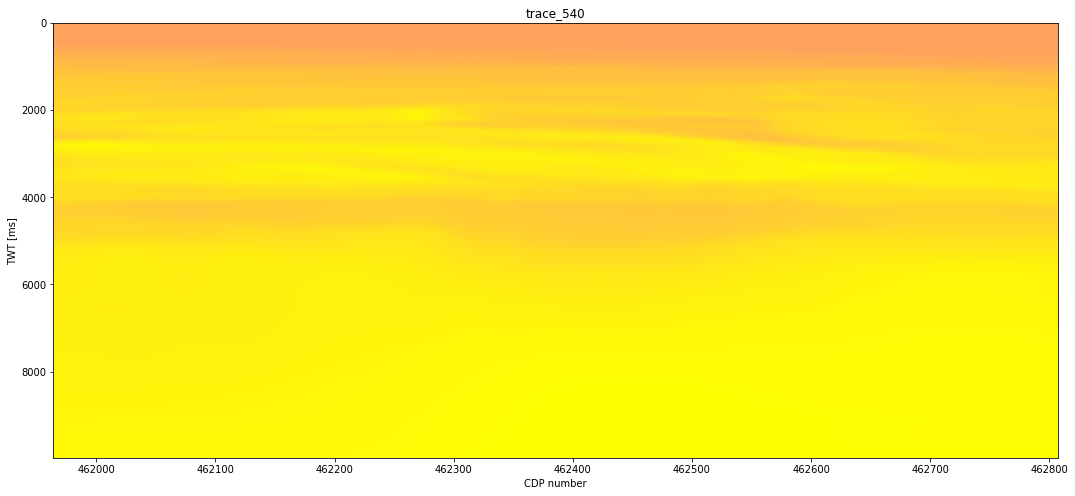

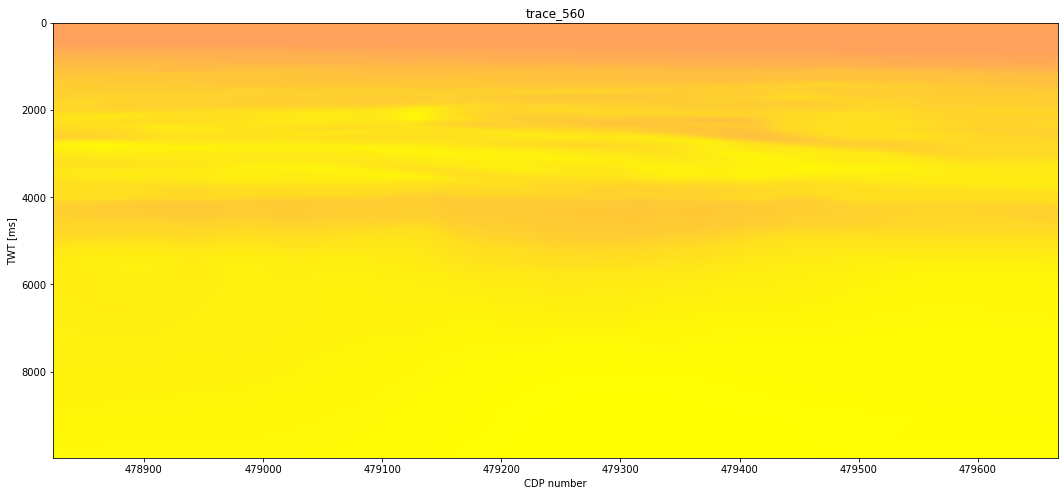

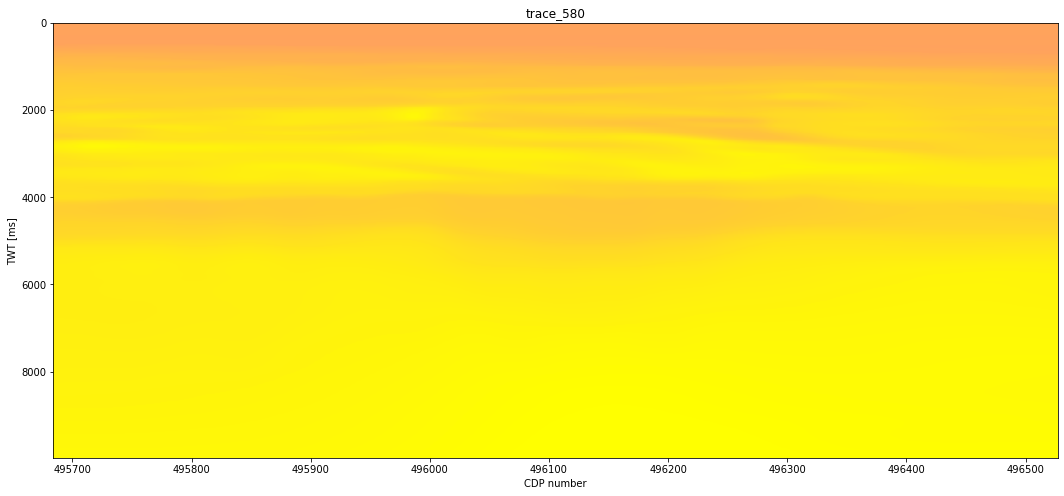

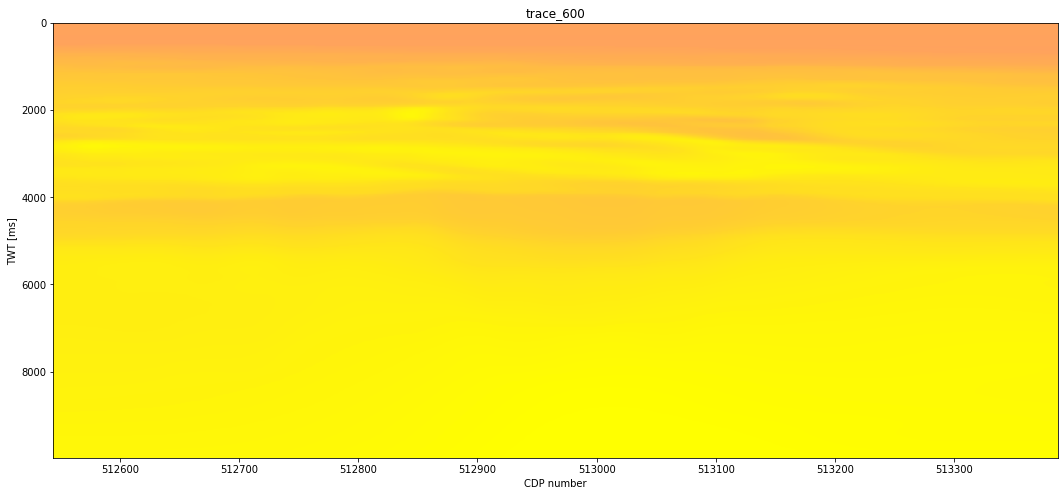

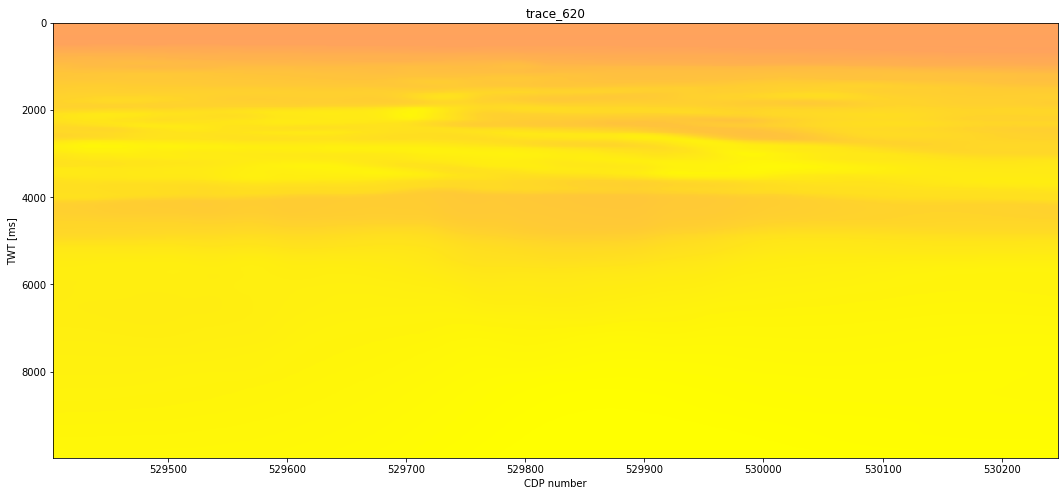

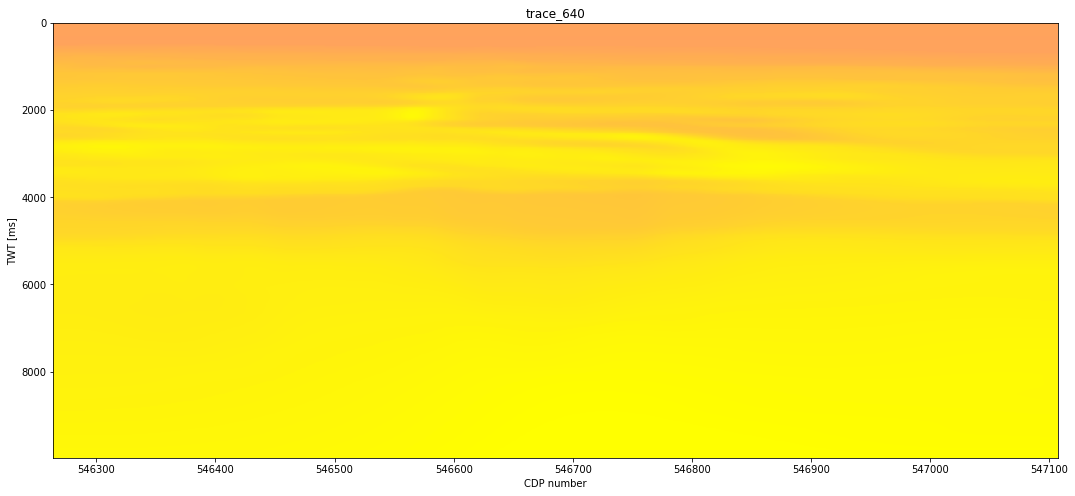

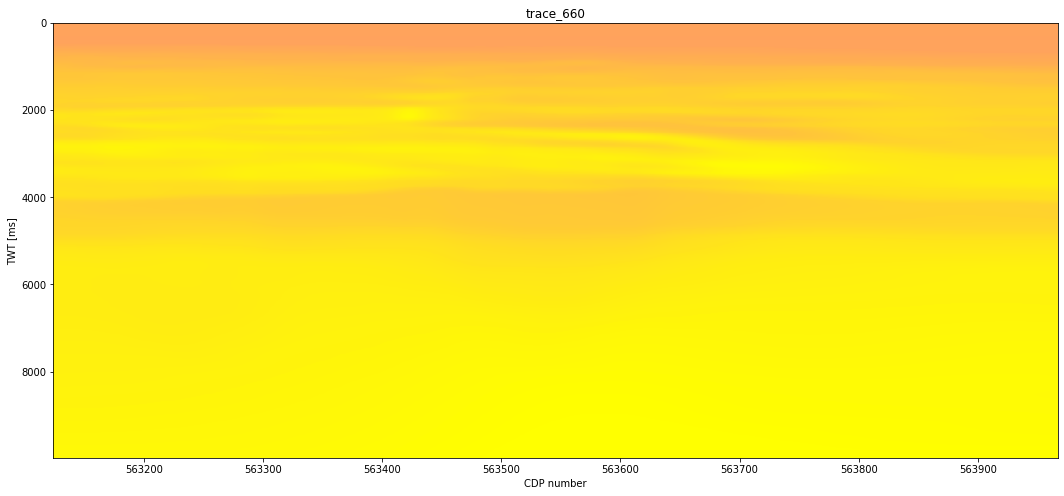

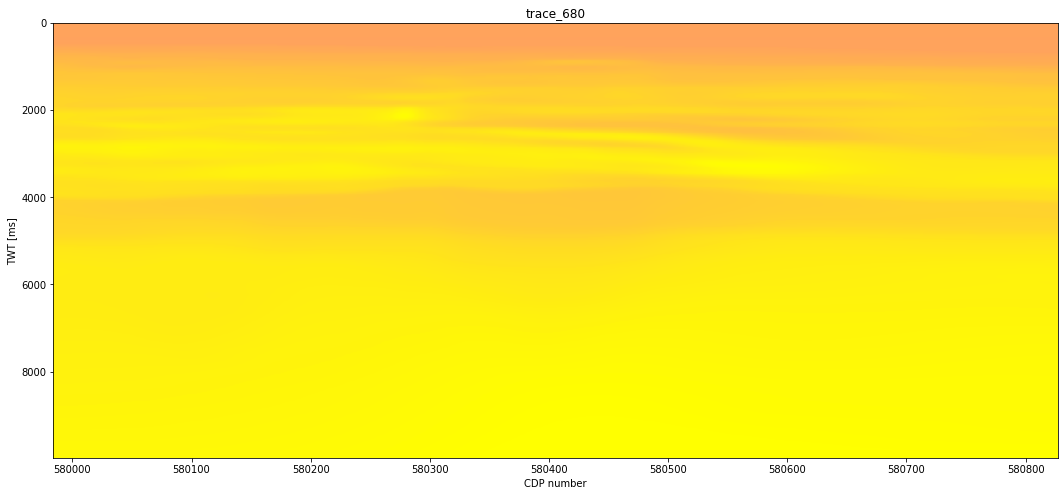

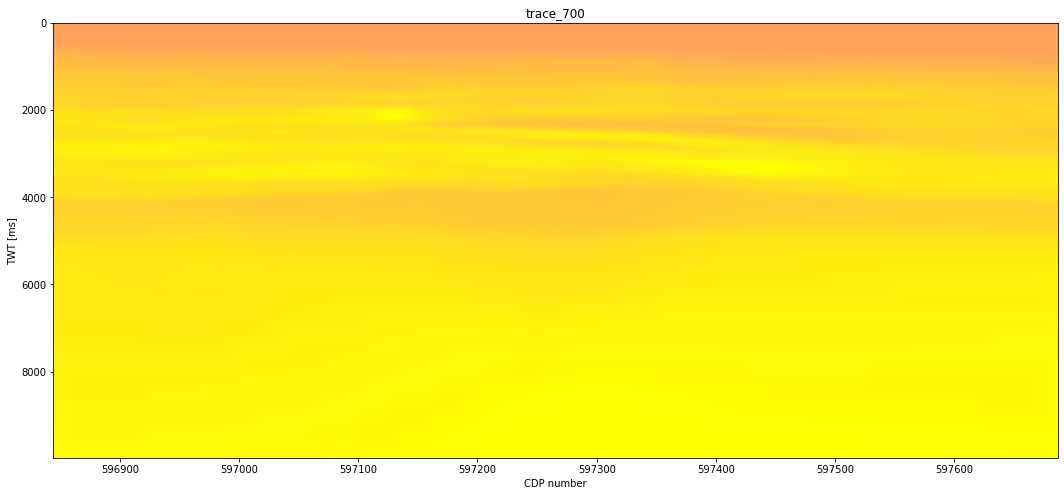

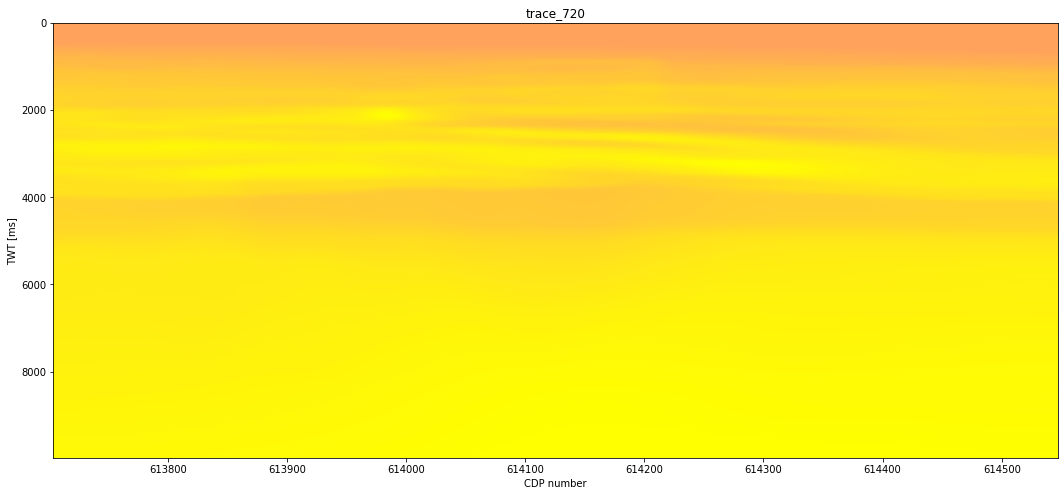

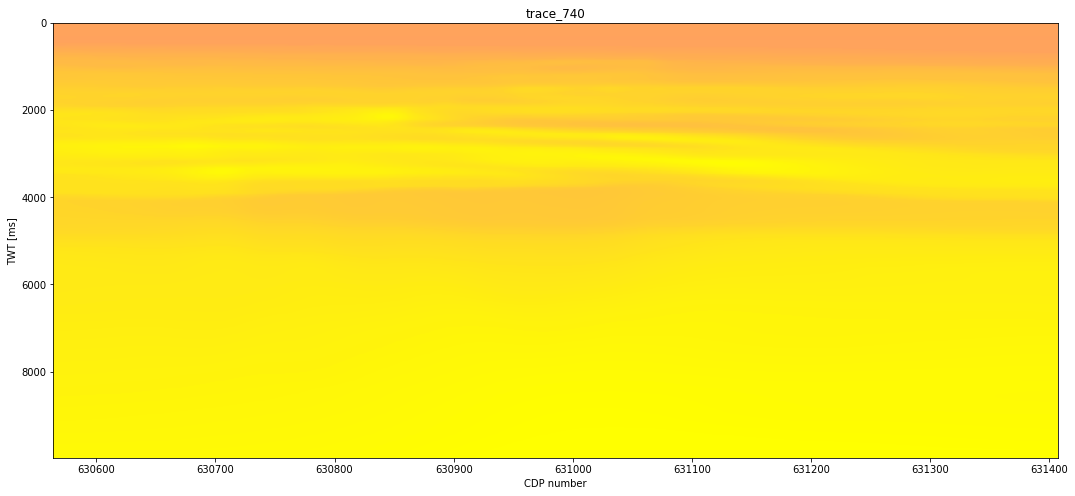

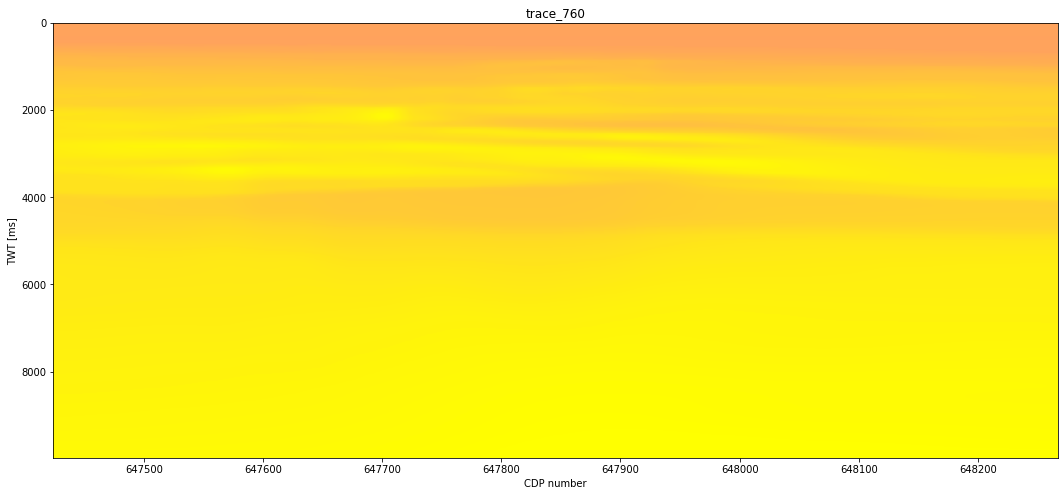

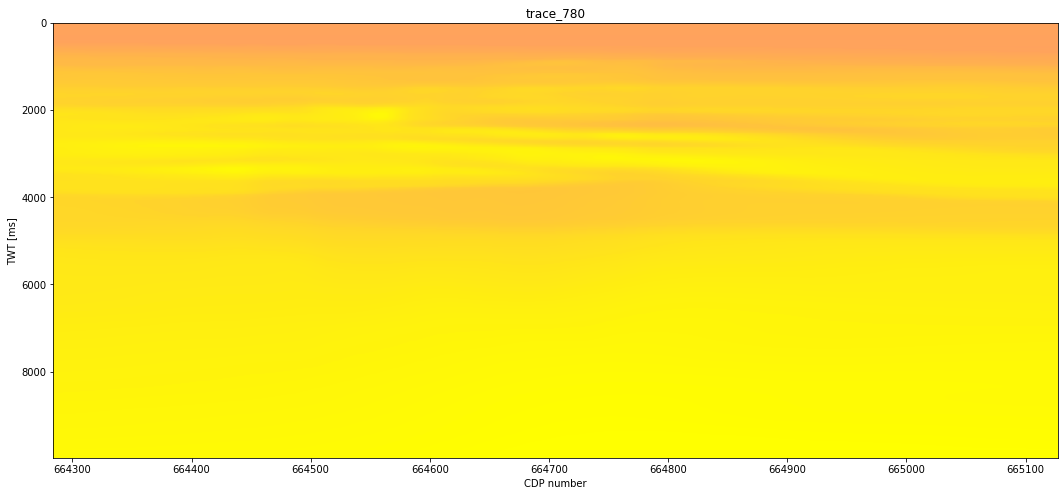

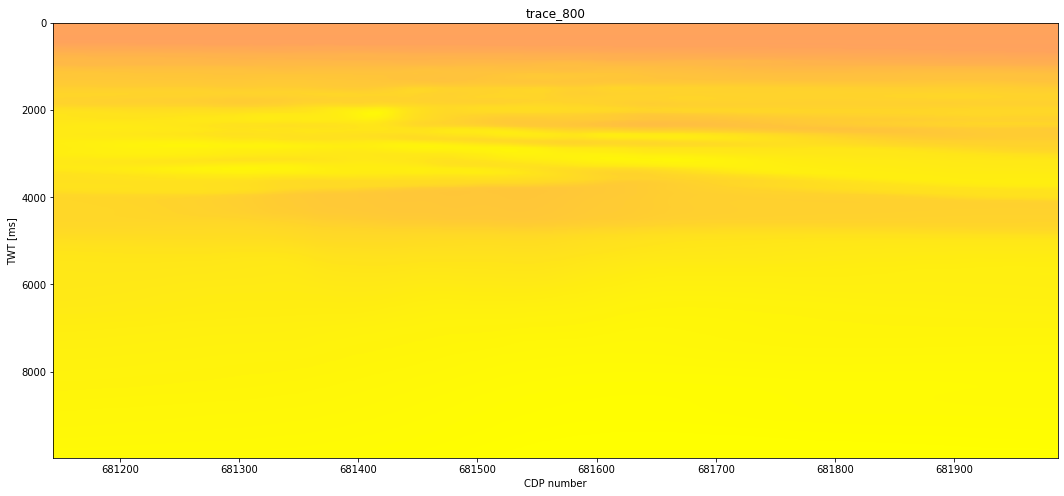

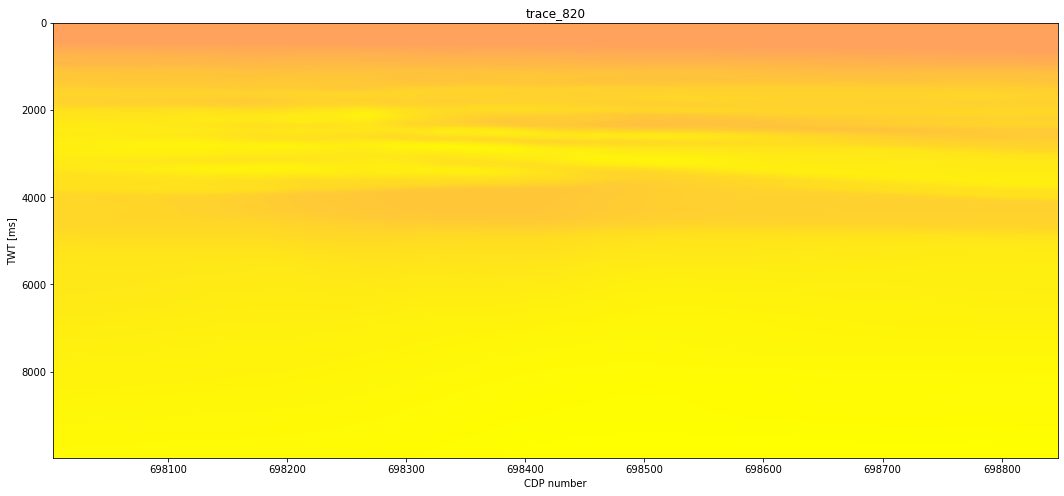

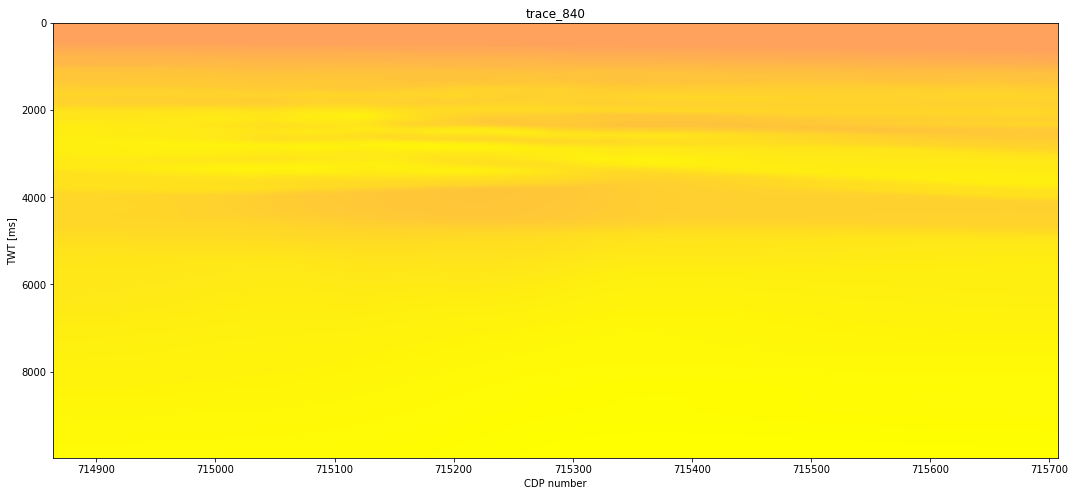

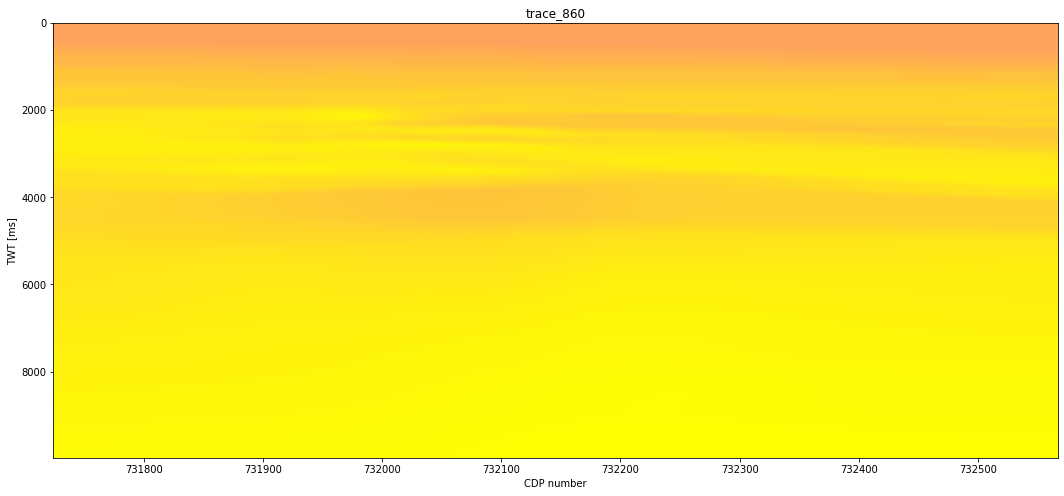

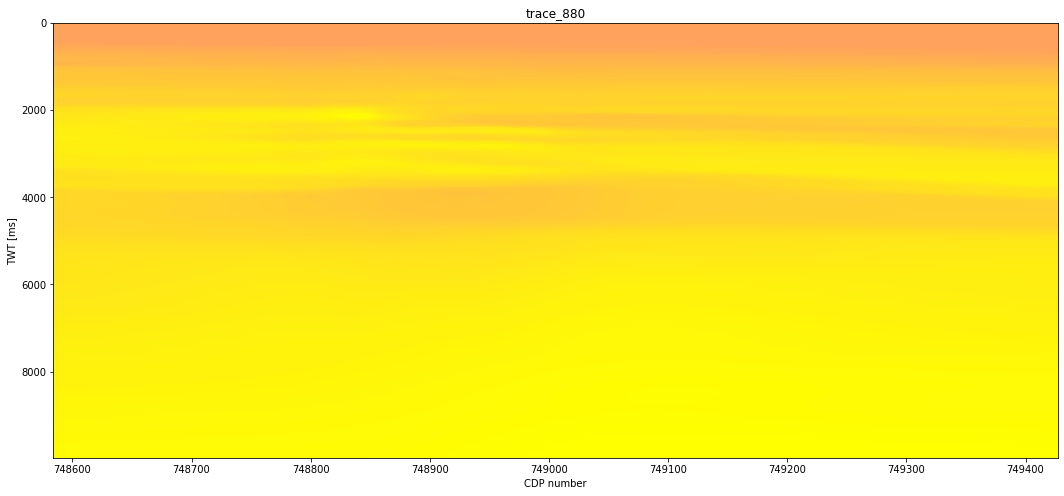

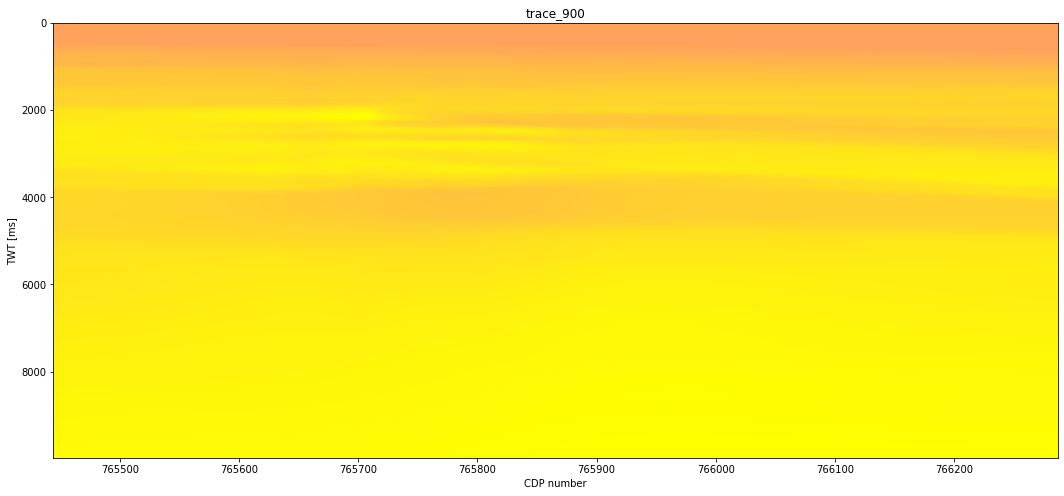

In [104]:
while j<1000:
    j=i+20
    i=j
    clip_percentile = 99
    vm = np.percentile(data[list_trace[j]:list_trace[j+1]], clip_percentile)
    fig = plt.figure(figsize=(18, 8))
    ax = fig.add_subplot(1, 1, 1)
    extent = [list_trace[j], list_trace[j+1], twt[-1], twt[0]]  # define extent
    ax.imshow(data[list_trace[j]:list_trace[j+1]].T, cmap="spring", vmin=-vm, vmax=vm, aspect='auto', extent=extent)
    ax.set_xlabel('CDP number')
    ax.set_ylabel('TWT [ms]')
    ax.set_title('trace_'+ str(i))
    fig.savefig('trace_' + str(i) + '.png')

<bound method SegyFile.attributes of SegyFile('Poseidon3D_Final_PSDM_Decimated_vels.segy', 'r', iline = 189, xline = 193)>


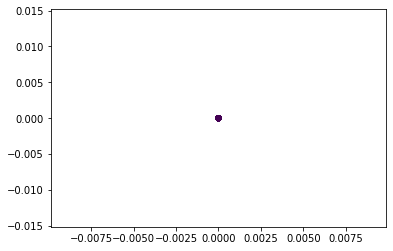

In [16]:
with segyio.open(filename, ignore_geometry=True) as segyfile:
    segyfile.mmap()
    print(segyfile.attributes)

    # Extract header word for all traces
    sourceX = segyfile.attributes(segyio.TraceField.SourceX)[:]

    # Scatter plot sources and receivers color-coded on their number
    plt.figure()
    sourceY = segyfile.attributes(segyio.TraceField.SourceY)[:]
    nsum = segyfile.attributes(segyio.TraceField.NSummedTraces)[:]
    plt.scatter(sourceX, sourceY, c=nsum, edgecolor='none')

    groupX = segyfile.attributes(segyio.TraceField.GroupX)[:]
    groupY = segyfile.attributes(segyio.TraceField.GroupY)[:]
    nstack = segyfile.attributes(segyio.TraceField.NStackedTraces)[:]
    plt.scatter(groupX, groupY, c=nstack, edgecolor='none')


In [21]:
5556-504

5052

In [22]:
4419-983

3436

In [23]:
5052*3436

17358672

In [51]:
766287/847

904.7072018890201